Please make sure you have the font files and and necessary media addressed properly or else the code will throw errors!

# Code for the Designare Problem statement; we like to call it Fonter :)

## Computing Eigenfaces and then Sobel, Laplacian Operators

We are taking 2 fonts arial and vremya for now, using the PIL library we are creating 2 images one each for arial and vremya containing a letter that we will use to develop the new font with. We compute the eigenface using PCA for the 2 fonts and then use that further.

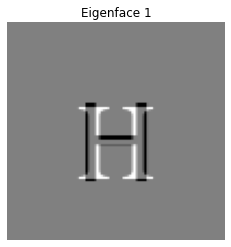

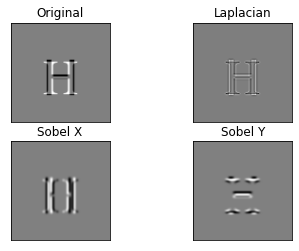

In [11]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw, ImageFont

# Define the dimensions of the image
image_width = 100
image_height = 100

# Create a new blank image (white background)
image_1 = Image.new("RGB", (image_width, image_height), "white")
image_2 = Image.new("RGB", (image_width, image_height), "white")

# Load fonts (replace 'arial.ttf' and 'times.ttf' with actual font paths on your system)
arial_font = ImageFont.truetype("arial.ttf", size=50)
times_font = ImageFont.truetype("vremya.ttf", size=50)

# Create a drawing context
draw_1 = ImageDraw.Draw(image_1)
draw_2 = ImageDraw.Draw(image_2)

text = 'H'

# Get the size of the text
text_width, text_height = draw_1.textsize(text, font=arial_font)

# Calculate the position to center the text
x = (image_width - text_width) / 2
y = (image_height - text_height) / 2

# Draw the text on the image
draw_1.text((x, y), text, fill="black", font=arial_font)
draw_2.text((x, y), text, fill="black", font=times_font)

# Save the images
image_1.save("L11.png")
image_2.save("L22.png")

# Load images
image1 = cv2.imread('L11.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('L22.png', cv2.IMREAD_GRAYSCALE)

# Ensure images have the same dimensions
image1 = cv2.resize(image1, (100, 100))
image2 = cv2.resize(image2, (100, 100))

# Convert images to arrays
image1_array = np.array(image1).flatten()
image2_array = np.array(image2).flatten()

# Combine images into one dataset
images_dataset = np.vstack((image1_array, image2_array))

# Applying PCA
pca = PCA(n_components=1)  # You can change the number of components as needed
pca.fit(images_dataset)

# Retrieving eigenfaces
eigenfaces = pca.components_

# Visualizing eigenfaces
plt.figure(figsize=(8, 4))
for i, eigenface in enumerate(eigenfaces, 1):
    plt.subplot(1, len(eigenfaces), i)
    eigenface_image = eigenface.reshape(image1.shape)
    plt.imshow(eigenface_image, cmap='gray')
    plt.title(f'Eigenface {i}')
    plt.axis('off')

plt.show()

# Applying Sobel operator for edge detection
laplacian = cv2.Laplacian(eigenface_image, cv2.CV_64F)
sobelx = cv2.Sobel(eigenface_image, cv2.CV_64F, 1, 0, ksize=5)  # x
sobely = cv2.Sobel(eigenface_image, cv2.CV_64F, 0, 1, ksize=5)  # y

# Plotting
plt.subplot(2, 2, 1), plt.imshow(eigenface_image, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()


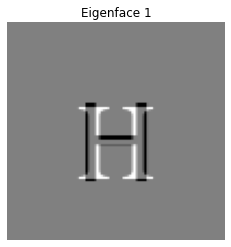

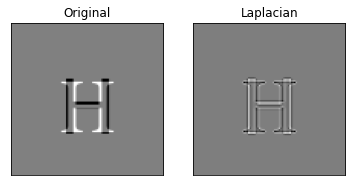

In [12]:
image_width = 100
image_height = 100

image_1 = Image.new("RGB", (image_width, image_height), "white")
image_2 = Image.new("RGB", (image_width, image_height), "white")

arial_font = ImageFont.truetype("arial.ttf", size=50)
times_font = ImageFont.truetype("vremya.ttf", size=50)

draw_1 = ImageDraw.Draw(image_1)
draw_2 = ImageDraw.Draw(image_2)

text = 'H'

text_width, text_height = draw_1.textsize(text, font=arial_font)

x = (image_width - text_width) / 2
y = (image_height - text_height) / 2

draw_1.text((x, y), text, fill="black", font=arial_font)
draw_2.text((x, y), text, fill="black", font=times_font)

# Save the images
image_1.save("L11.png")
image_2.save("L22.png")
image1 = cv2.imread('L11.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('L22.png', cv2.IMREAD_GRAYSCALE)
image1 = cv2.resize(image1, (100, 100))
image2 = cv2.resize(image2, (100, 100))
image1_array = np.array(image1).flatten()
image2_array = np.array(image2).flatten()
images_dataset = np.vstack((image1_array, image2_array))
pca = PCA(n_components=1)
pca.fit(images_dataset)
eigenfaces = pca.components_

# Visualize eigenfaces
plt.figure(figsize=(8, 4))
for i, eigenface in enumerate(eigenfaces, 1):
    plt.subplot(1, len(eigenfaces), i)
    eigenface_image = eigenface.reshape(image1.shape)
    plt.imshow(eigenface_image, cmap='gray')
    plt.title(f'Eigenface {i}')
    plt.axis('off')

plt.show()

# Apply Laplacian operator for edge detection
laplacian = cv2.Laplacian(eigenface_image, cv2.CV_64F)

# Plotting
plt.subplot(1, 2, 1), plt.imshow(eigenface_image, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()


# Processing the Gradient Magnitude and Overlay for a better image refinement 

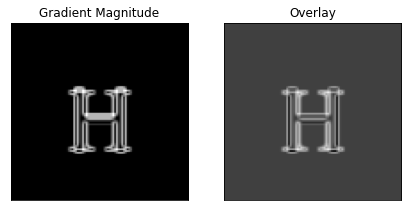

In [13]:
# Apply Sobel-Feldman edge detection on the eigenface
sobel_x = cv2.Sobel(eigenface_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(eigenface_image, cv2.CV_64F, 0, 1, ksize=3)

# Compute the gradient magnitude
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize the gradient magnitude to [0, 255]
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Set the size of the figure
plt.figure(figsize=(7, 6))

# Plotting gradient magnitude
plt.subplot(1, 2, 1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.xticks([])
plt.yticks([])

# Plotting the overlay
plt.subplot(1, 2, 2)
plt.imshow(eigenface_image, cmap='gray')
plt.title('Overlay')
plt.xticks([])
plt.yticks([])

# Overlay edges on the original image for visualization
overlay = cv2.addWeighted(eigenface_image, 0.7, gradient_magnitude, 0.3, 0)
plt.imshow(overlay, cmap='gray', alpha=0.5)

plt.show()


# Sharpening the Gradient Magnitude 

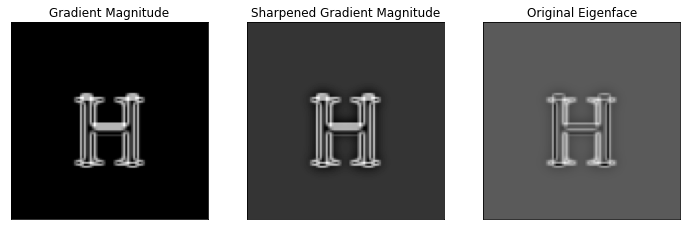

In [14]:
blurred = cv2.GaussianBlur(gradient_magnitude, (0, 0), 3)
sharpened = cv2.addWeighted(gradient_magnitude, 1, blurred, -0.5, 0)
plt.figure(figsize=(12, 6))

# Plotting gradient magnitude
plt.subplot(1, 3, 1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.xticks([])
plt.yticks([])

# Plotting the sharpened gradient magnitude
plt.subplot(1, 3, 2)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Gradient Magnitude')
plt.xticks([])
plt.yticks([])

# Plotting the original eigenface image
plt.subplot(1, 3, 3)
plt.imshow(eigenface_image, cmap='gray')
plt.title('Original Eigenface')
plt.xticks([])
plt.yticks([])

# Overlay sharpened edges on the original image for visualization
overlay = cv2.addWeighted(eigenface_image, 0.7, sharpened, 0.3, 0)
plt.imshow(overlay, cmap='gray', alpha=0.5)

plt.show()


# Threshholding

We can observe that the sharpened gradient magnitude image has few blank parts in it, so we threshold the image to reverse the b&w. 

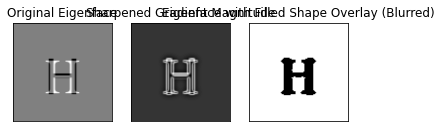

In [15]:
# Plotting the original eigenface image
plt.subplot(1, 3, 1)
plt.imshow(eigenface_image, cmap='gray')
plt.title('Original Eigenface')
plt.xticks([])
plt.yticks([])

# Plotting gradient magnitude
plt.subplot(1, 3, 2)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Gradient Magnitude')
plt.xticks([])
plt.yticks([])

# Apply Gaussian blurring to the sharpened image
blurred = cv2.GaussianBlur(sharpened.astype(np.float32), (5, 5), 0)

# Convert the blurred image to 8-bit unsigned integer format
blurred_uint8 = cv2.convertScaleAbs(blurred)

# Convert the blurred image to binary using thresholding
_, binary_image = cv2.threshold(blurred_uint8, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Find contours on the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a white background image
filled_shape = np.ones_like(eigenface_image) * 255

# Draw contours on the white image
cv2.drawContours(filled_shape, contours, -1, (0, 0, 0), thickness=cv2.FILLED)

# Overlay filled shape on the original eigenface image for visualization
overlay = cv2.addWeighted(eigenface_image, 0.7, filled_shape, 0.3, 0)

# Plot the overlay
plt.subplot(1, 3, 3)
plt.imshow(overlay, cmap='gray')
plt.title('Eigenface with Filled Shape Overlay (Blurred)')
plt.xticks([])
plt.yticks([])

plt.show()


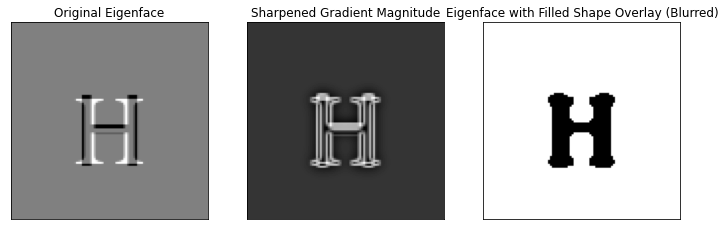

In [16]:
plt.figure(figsize=(12, 6))

# Plotting the original eigenface image
plt.subplot(1, 3, 1)
plt.imshow(eigenface_image, cmap='gray')
plt.title('Original Eigenface')
plt.xticks([])
plt.yticks([])

# Plotting gradient magnitude
plt.subplot(1, 3, 2)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Gradient Magnitude')
plt.xticks([])
plt.yticks([])

# Apply Gaussian blurring to the sharpened image
blurred = cv2.GaussianBlur(sharpened.astype(np.float32), (5, 5), 0)

# Convert the blurred image to 8-bit unsigned integer format
blurred_uint8 = cv2.convertScaleAbs(blurred)

# Apply median filtering
blurred_median = cv2.medianBlur(blurred_uint8, 5)  # Adjust the kernel size as needed

# Convert the blurred image to binary using thresholding
_, binary_image = cv2.threshold(blurred_median, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Find contours on the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a white background image
filled_shape = np.ones_like(eigenface_image) * 255

# Draw contours on the white image
cv2.drawContours(filled_shape, contours, -1, (0, 0, 0), thickness=cv2.FILLED)

# Overlay filled shape on the original eigenface image for visualization
overlay = cv2.addWeighted(eigenface_image, 0.7, filled_shape, 0.3, 0)

# Plot the overlay
plt.subplot(1, 3, 3)
plt.imshow(overlay, cmap='gray')
plt.title('Eigenface with Filled Shape Overlay (Blurred)')
plt.xticks([])
plt.yticks([])

plt.show()


We perform dilation to increase the brighteness of the image and then further smoothen it

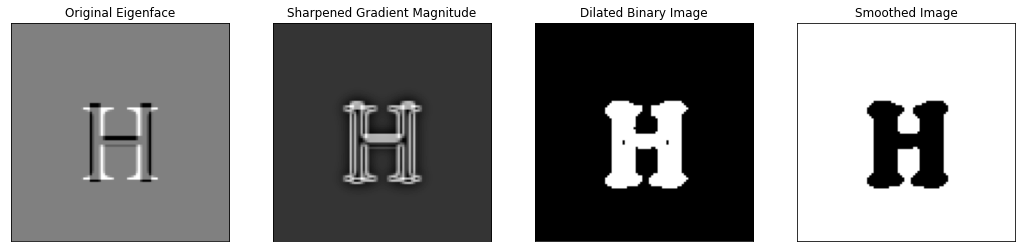

In [17]:
plt.figure(figsize=(18, 6))

# Plotting the original eigenface image
plt.subplot(1, 4, 1)
plt.imshow(eigenface_image, cmap='gray')
plt.title('Original Eigenface')
plt.xticks([])
plt.yticks([])

# Plotting gradient magnitude
plt.subplot(1, 4, 2)
plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened Gradient Magnitude')
plt.xticks([])
plt.yticks([])

# Apply Gaussian blurring to the sharpened image
blurred = cv2.GaussianBlur(sharpened.astype(np.float32), (5, 5), 0)

# Convert the blurred image to 8-bit unsigned integer format
blurred_uint8 = cv2.convertScaleAbs(blurred)

# Convert the blurred image to binary using thresholding
_, binary_image = cv2.threshold(blurred_uint8, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Perform morphological dilation to expand white regions
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))  # Adjust the kernel size as needed
dilated_image = cv2.dilate(binary_image, kernel, iterations=2)

# Plot the dilated image
plt.subplot(1, 4, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Binary Image')
plt.xticks([])
plt.yticks([])

# Sharpening and increasing brightness
# Define the sharpening kernel
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])

# Apply sharpening
sharpened_image = cv2.filter2D(dilated_image, -1, kernel_sharpening)

# Increase brightness
brightened_image = sharpened_image + 70  # Increase brightness by 50 units

# Apply Gaussian blur to smoothen the edges
smoothed_image = cv2.GaussianBlur(brightened_image, (5, 5), 0)

# Plot the smoothed image
plt.subplot(1, 4, 4)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.xticks([])
plt.yticks([])

plt.show()


The edges still look rough and so we try to apply a black outline to it

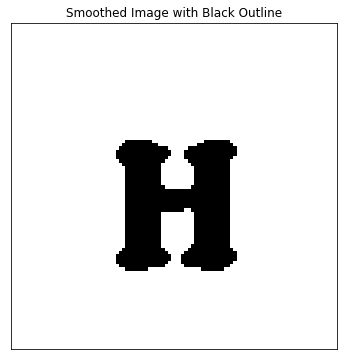

In [18]:
# Convert the smoothed image to binary using thresholding
_, smoothed_binary = cv2.threshold(smoothed_image, 127, 255, cv2.THRESH_BINARY)

# Perform morphological erosion to create a black outline
kernel_outline = np.ones((1, 1), np.uint8)
smoothed_binary_outline = cv2.erode(smoothed_binary, kernel_outline, iterations=1)

# Combine the smoothed image with the outline
smoothed_image_with_outline = cv2.bitwise_or(smoothed_image, smoothed_binary_outline)

# Plot the smoothed image with the black outline
plt.figure(figsize=(12, 6))
plt.imshow(smoothed_image_with_outline, cmap='gray')
plt.title('Smoothed Image with Black Outline')
plt.xticks([])
plt.yticks([])
plt.show()


# All these codes were combined to produce the final user-end view in our streamlit app 'fonter.py' 